<a href="https://colab.research.google.com/github/lucaslau77/PO/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
# Import libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [269]:
# Get ticker symbol
ticker =  "WYNN"

# Create a variable for predicting 'n' days out into the future
projection = 365

In [270]:
# Get the price starting date
StartDate = '2019-04-08'

# Get the price ending date
today = datetime.today().strftime('%Y-%m-%d')
#today = '2020-10-01'

In [271]:
# Create a dataframe to store the adjusted close price of stock
df = pd.DataFrame()

# Store the adjusted close price of stock into df
df = web.DataReader(ticker, data_source='yahoo', start=StartDate, end=today)

# Show the df
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-08,145.940002,142.630005,145.309998,144.850006,3477600.0,139.915512
2019-04-09,142.990005,138.100006,142.750000,139.259995,3139400.0,134.515930
2019-04-10,141.119995,138.960007,139.820007,141.000000,1371400.0,136.196671
2019-04-11,141.470001,139.279999,140.960007,141.020004,1767900.0,136.215988
2019-04-12,143.899994,141.100006,142.000000,143.779999,2177600.0,138.881958
...,...,...,...,...,...,...
2021-06-11,127.269997,124.769997,126.239998,127.169998,1205800.0,127.169998
2021-06-14,127.519997,123.900002,127.199997,124.949997,3051900.0,124.949997
2021-06-15,126.209999,124.570000,124.949997,125.400002,1658200.0,125.400002


In [272]:
# Create a new column called prediction
df['Prediction'] = df[['Close']].shift(-projection)
df

,High,Low,Open,Close,Volume,Adj Close,Prediction
Date,,,,,,,
2019-04-08,145.940002,142.630005,145.309998,144.850006,3477600.0,139.915512,79.300003
2019-04-09,142.990005,138.100006,142.750000,139.259995,3139400.0,134.515930,77.699997
2019-04-10,141.119995,138.960007,139.820007,141.000000,1371400.0,136.196671,72.300003
2019-04-11,141.470001,139.279999,140.960007,141.020004,1767900.0,136.215988,73.419998
2019-04-12,143.899994,141.100006,142.000000,143.779999,2177600.0,138.881958,70.690002
...,...,...,...,...,...,...,...
2021-06-11,127.269997,124.769997,126.239998,127.169998,1205800.0,127.169998,NaN
2021-06-14,127.519997,123.900002,127.199997,124.949997,3051900.0,124.949997,NaN
2021-06-15,126.209999,124.570000,124.949997,125.400002,1658200.0,125.400002,NaN


In [273]:
# Create the independent data set (x)
X = np.array(df[['Close']])

# Remove the last n rows
X = X[:-projection]

In [274]:
# Create the dependent data set (y)
y = df['Prediction'].values
y = y[:-projection]

In [275]:
# Split the data into 85% training and 15% testing datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .15)

In [276]:
# Create and train the model
linReg = LinearRegression()

# Train the model
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [277]:
# Test the model using score
linReg_confidence = linReg.score(x_test, y_test)
print('Linear Regression Confidence:', linReg_confidence)

Linear Regression Confidence: -0.16156123641557718


In [278]:
# Create a variable called x_projection and set it equal to the last n rows of data from the original dataset
x_projection = np.array(df[['Close']])[-projection:]

In [279]:
# Print the linear regression model predictions for the next n days
linReg_prediction = linReg.predict(x_projection)
print(linReg_prediction)

[ 95.7294109   95.07451594  95.51602296  94.88320223  91.79267558
  89.71761955  89.71761955  88.11348788  88.54764056  95.39828626
  97.03184649  97.75296414 100.96121626 108.95241239 108.1577065
 108.98184657 106.94357344 107.28205803 105.50133254 102.46968546
 102.77873588 101.37328349 106.73017988 106.01642218 102.99212383
  99.43802717 101.79271628 102.88175269 101.91044175  99.9163283
 102.00610422 105.96491378 111.68972894 116.31078779 118.62131722
 118.31962113 120.65958473 120.68901891 124.73612538 122.3667276
 129.78397135 130.92452178 139.82815489 133.76485514 140.60814089
 150.06365777 146.75238884 159.79142813 160.10047855 168.45959345
 165.8400108  161.87384691 157.75315781 151.1379799  144.88336081
 147.49558071 153.5294491  155.15565219 155.82526424 160.3800976
 161.35876288 164.42720407 158.37126146 155.33961158 149.2910261
 148.12840144 149.121781   145.31014232 147.24539864 146.92162833
 142.38151205 146.18579079 148.31236083 148.58462274 144.15487761
 143.74281038 1

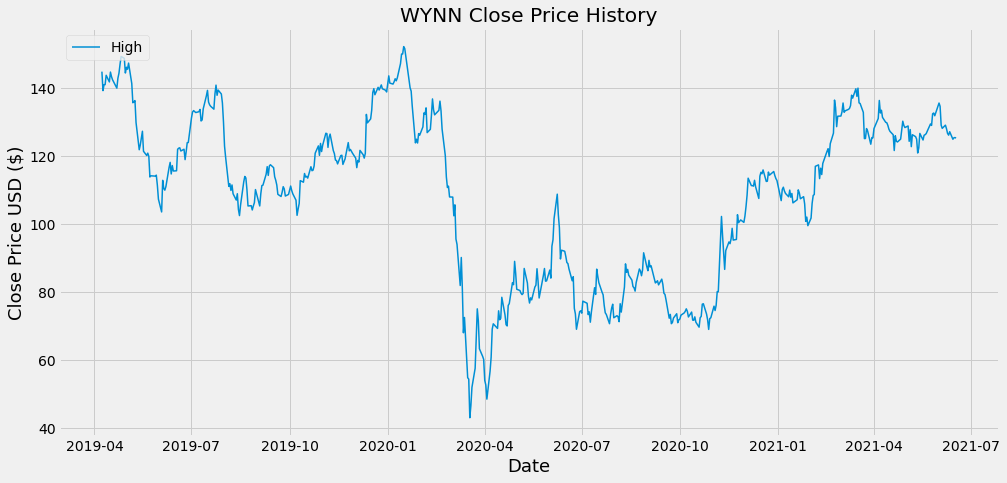

In [280]:
# Show original price chart
title = ticker + ' Close Price History'

# Create and plot the graph
plt.figure(figsize=(15.0, 7.0)) #width = 15.0 in, height = 7.0 in

# Loop through each stock and plot the Adj Close for each day
plt.plot( df['Close'], linewidth=1.5, label='Close') # plt.plot( X-Axis, Y-Axis, linewidth, alpha_for_blending, label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

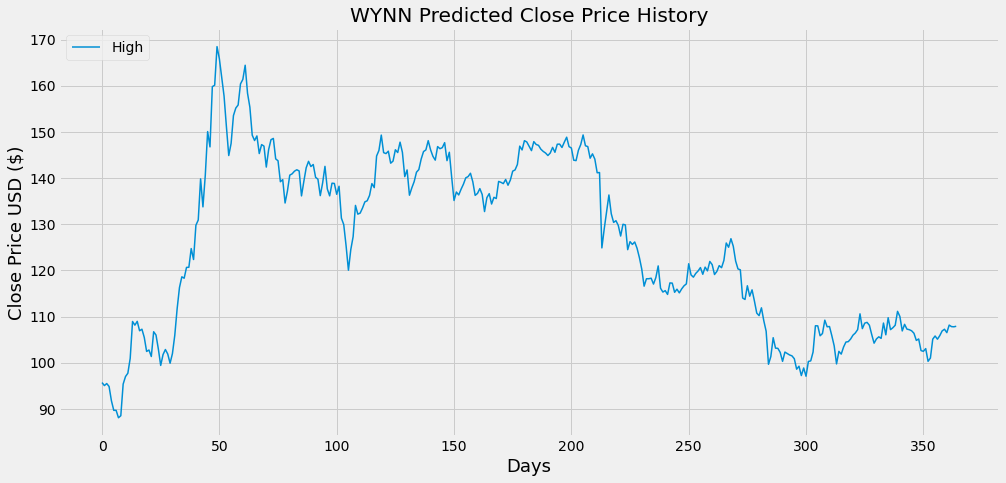

In [281]:
# Show predicted price chart
title = ticker + ' Predicted Close Price'

# Create and plot the graph
plt.figure(figsize=(15.0, 7.0)) #width = 15.0 in, height = 7.0 in

# Loop through each stock and plot the Adj Close for each day
plt.plot( linReg_prediction, linewidth=1.5, label='Close') # plt.plot( X-Axis, Y-Axis, linewidth, alpha_for_blending, label)
plt.title(title)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()